In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # loading the dataset

In [3]:
df.sample(5) # loading a 5 random samples from the dataset 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5494,8837-VVWLQ,Female,0,No,No,8,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,84.95,668.4,Yes
1563,3223-DWFIO,Male,1,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,69.35,261.65,No
1548,5522-NYKPB,Male,0,Yes,Yes,25,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,85.90,2199.05,No
6909,9108-EJFJP,Female,0,Yes,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.55,53.55,No
6010,3460-TJBWI,Male,0,Yes,Yes,24,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.20,609.05,No


In [4]:
df.shape # recognizing the number of columns and rows

(7043, 21)

In [5]:
df.isnull().any() #checking for any null values

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
df.duplicated().any() # checking for any dulicate rows

np.False_

In [7]:
df.describe() # description of the numerical values

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.dtypes # identifying the data types in all columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# assignig the churn's uniques values to varibales
target = df['Churn']
no, yes = target.value_counts()
print(target.value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [10]:
# turning the assigned varibles to a dataframe
yes_no_data = {'Churn': ['Yes', 'No'], 'count': [yes, no]}
data = pd.DataFrame(yes_no_data)

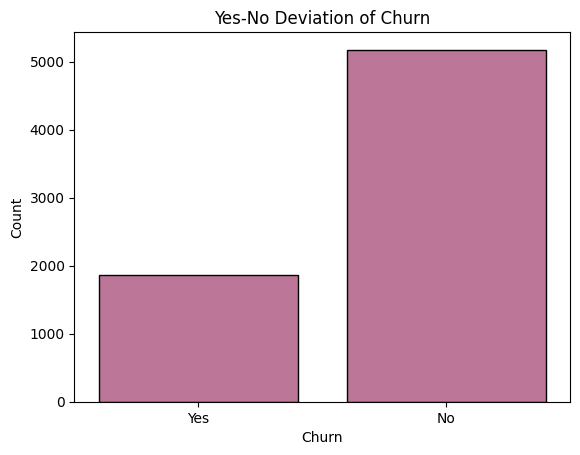

In [11]:
# ploting a bar plot to represent the difference visually
sns.barplot(data, x='Churn', y='count', color='#c76b98', edgecolor='black')
plt.xlabel('Churn')
plt.ylabel('Count', rotation=90)
plt.title('Yes-No Deviation of Churn')
plt.show()

In [12]:
# churn percentage calculation

yes_percentage = (yes/len(df['Churn'])) * 100
no_percentage = (no/len(df['Churn'])) * 100

print(f'Percentage of Yes : {yes_percentage:.3f}')
print(f'Percentage of No  : {no_percentage:.3f}')

Percentage of Yes : 26.537
Percentage of No  : 73.463


In [13]:
# getting info about the dataset

df.info(verbose=True) # verbose gives info on every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
data_2 = df
del df

In [15]:
# using a copy of the dataset which can be edited without accidently changing values in the original dataset
df = data_2.copy() 

In [16]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
778,3758-CKOQL,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.00,6152.3,No
868,3313-QKNKB,Male,0,Yes,No,59,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,One year,No,Electronic check,85.55,5084.65,Yes
6574,6969-MVBAI,Female,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,90.10,816.8,No
2549,0188-GWFLE,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,33.7,No


In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df.TotalCharges.dtype # dtype before

dtype('O')

In [19]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [20]:
df.TotalCharges.dtype # dtype after

dtype('float64')

In [21]:
df.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# identifing where the null values are and assigning them to variables
null_values_TotalCharges = df.loc[df.TotalCharges.isnull() == True]
null_values_TotalCharges 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
# dropping all the null values form the dataset
df = df.dropna(axis=0) 

In [24]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3854,0237-YFUTL,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.65,5405.80,No
1224,3165-HDOEW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,45.85,Yes
1381,3717-OEAUQ,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.70,129.20,No
1222,9091-WTUUY,Male,0,Yes,Yes,64,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,69.25,4447.75,No


In [25]:
# dropping unwanted columns in the dataset
df = df.drop(columns = ['customerID', 'tenure'], axis=1)
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5921,Female,0,No,No,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Mailed check,78.2,2078.95,No
393,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.9,367.55,No
424,Female,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),40.7,449.30,No


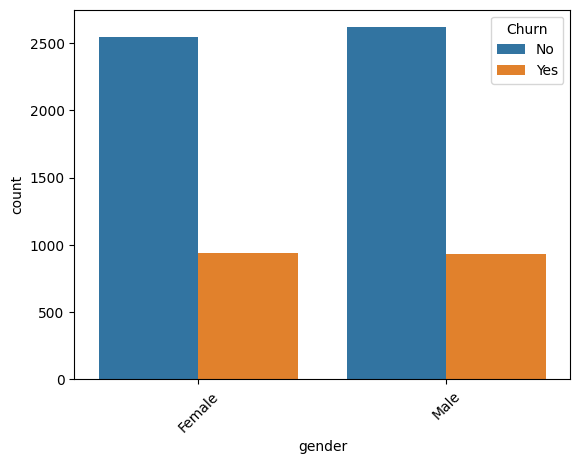

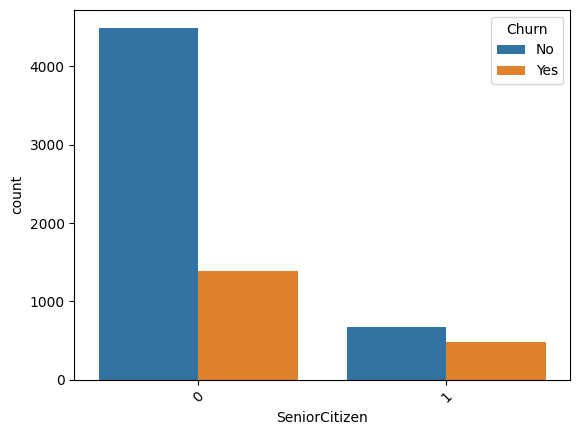

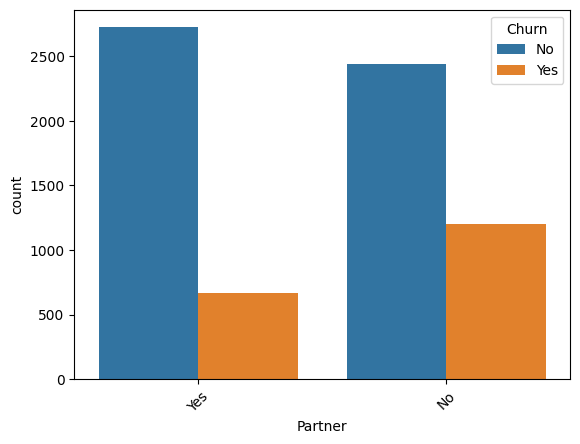

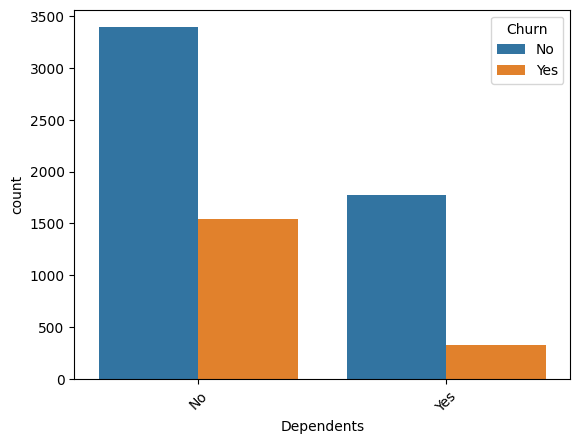

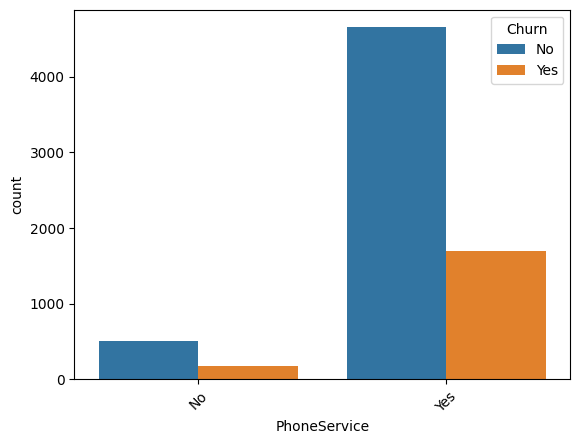

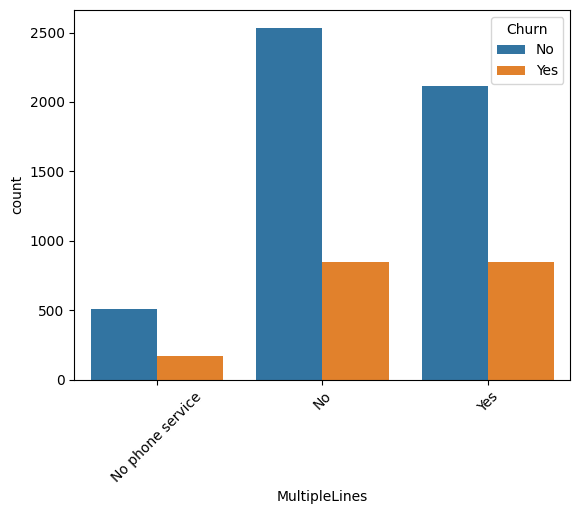

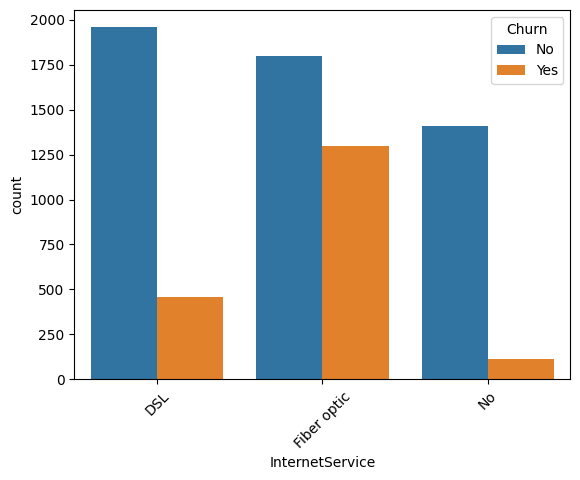

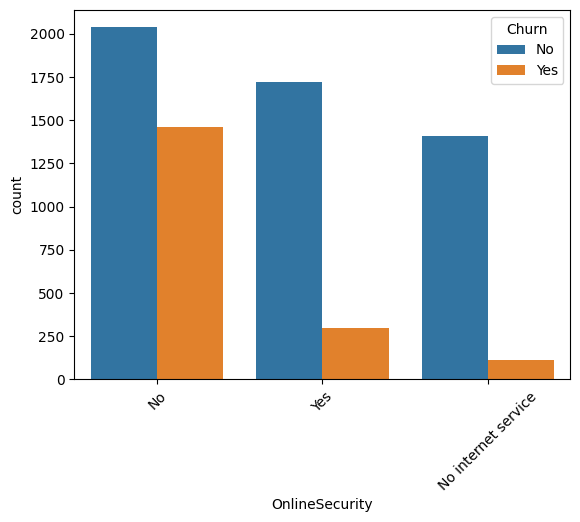

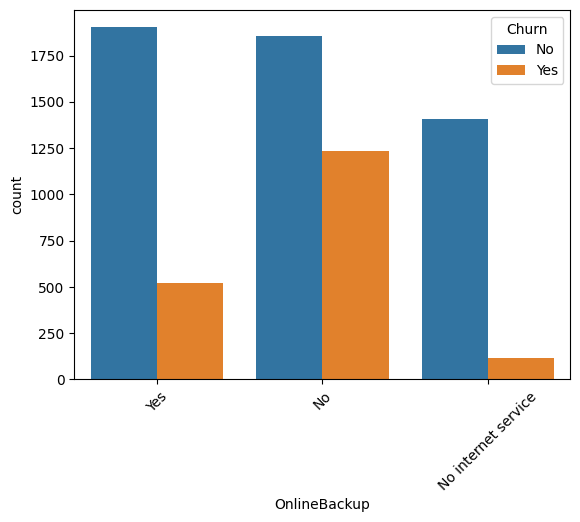

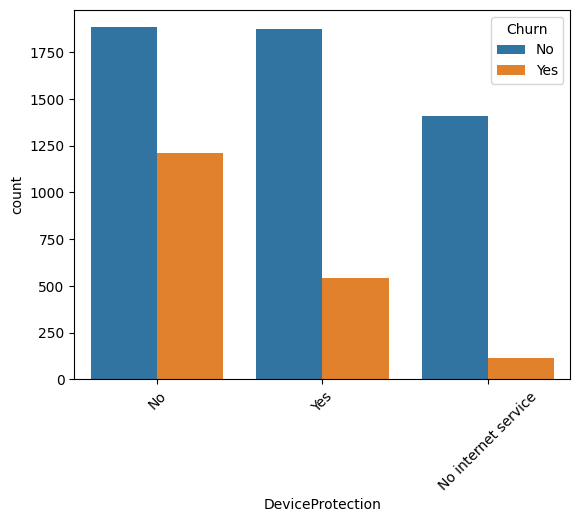

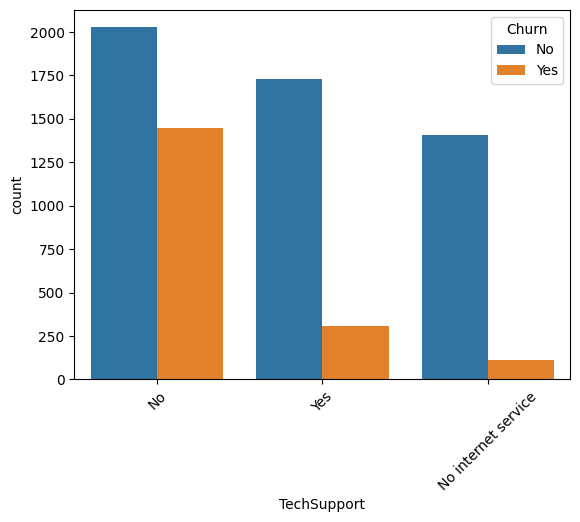

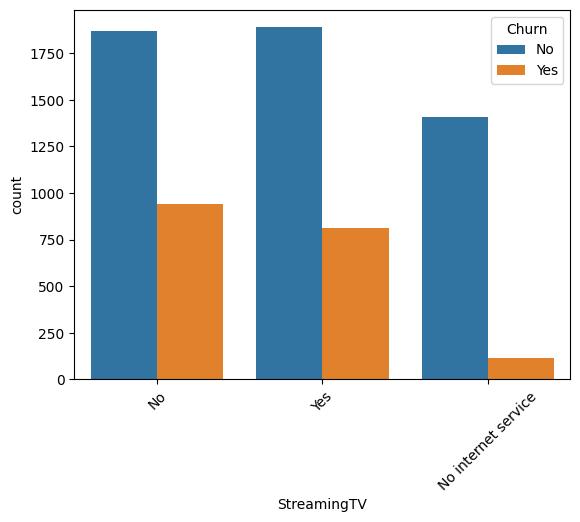

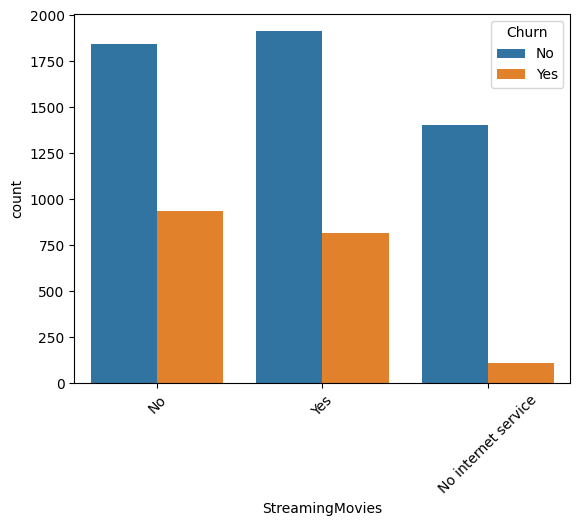

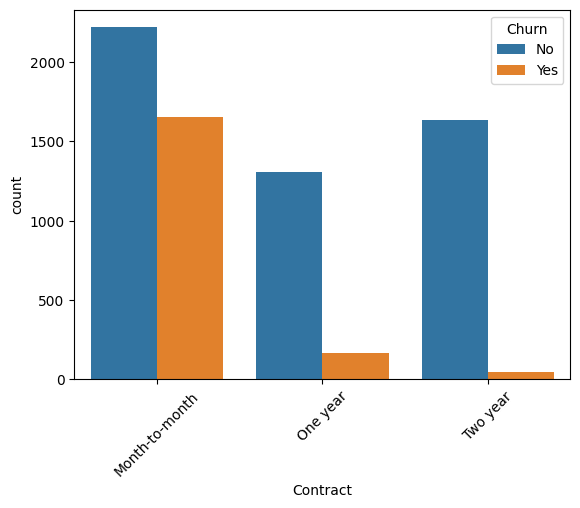

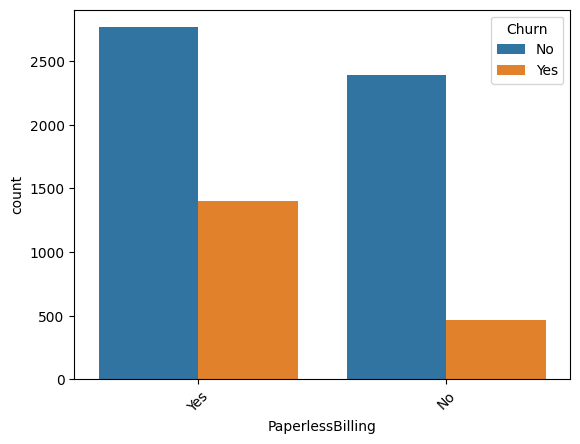

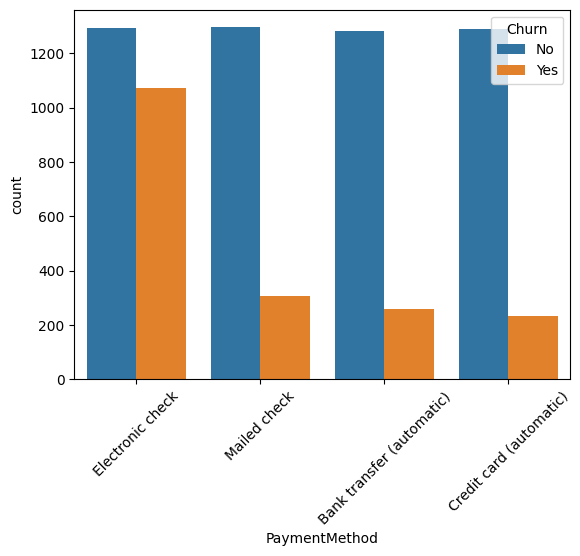

In [26]:
# visual representation of the counts in columns except for churn total_charges and monthly_charges 
for i, x in enumerate(df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df, x = x, hue = 'Churn')
    plt.xticks(rotation = 45)
    plt.show()

In [27]:
# convertion of 'Churn' into binary mode

df['Churn'] = np.where(df.Churn == 'Yes', 1, 0)
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
303,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.30,4109.00,0
6946,Female,0,No,Yes,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,0
3892,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,340.35,0
3985,Male,1,Yes,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.55,825.10,0


In [28]:
# creating dummy varibles for each possible column in the dataset
df_dummies = pd.get_dummies(data = df)
df_dummies.tail(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7040,0,29.60,346.45,0,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,1,74.40,306.60,1,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
7042,0,105.65,6844.50,0,False,True,True,False,True,False,...,True,False,False,True,False,True,True,False,False,False


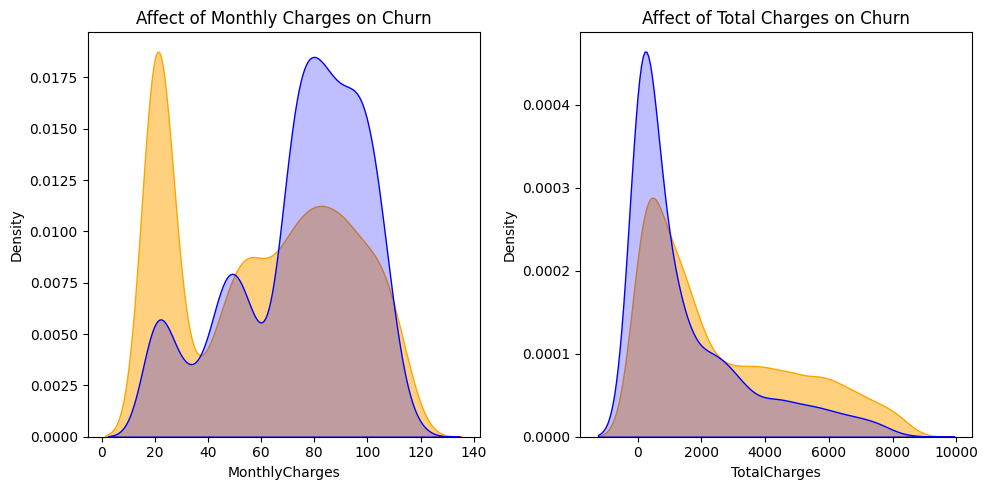

In [29]:
# Visualization of the affect of the MonthlyCharges and TotalCharges on Churn

fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Visualization of the affect of the MonthlyCharges on Churn
sns.kdeplot(data = df_dummies[df_dummies['Churn'] == 1], x='MonthlyCharges', ax = ax[0], color='blue', fill=True, zorder=2)
sns.kdeplot(data = df_dummies[df_dummies['Churn'] == 0], x='MonthlyCharges', ax = ax[0], color='orange', alpha=0.5, fill=True, zorder=1)
ax[0].set_title('Affect of Monthly Charges on Churn')

# Visualization of the affect of the TotalCharges on Churn
sns.kdeplot(data = df_dummies[df_dummies['Churn'] == 1], x='TotalCharges', ax = ax[1], color='blue', fill=True, zorder=2)
sns.kdeplot(data = df_dummies[df_dummies['Churn'] == 0], x='TotalCharges', ax = ax[1] ,color='orange', alpha=0.5, fill=True, zorder=1)
ax[1].set_title('Affect of Total Charges on Churn')

plt.tight_layout() # restricts overlapping 
plt.show()

In [30]:
# Finding the Correlation between each feature
corr_matrix = df_dummies.corr()
corr_matrix

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
MonthlyCharges,0.219874,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448
Dependents_Yes,-0.210550,-0.112343,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,-0.038375,-0.229715,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448


In [31]:
# Finding the Correlation between each feature and Churn
corr_matrix['Churn']

SeniorCitizen                              0.150541
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecurity_No                          0.342235
OnlineSecuri

In [32]:
# Finding the highest and the lowest correlations of Churn

directly_prop_churn = np.where(corr_matrix['Churn'] > 0)
indirectly_prop_churn = np.where(corr_matrix['Churn'] < 0)

directly_prop_churn = '\n'.join(df_dummies.columns[directly_prop_churn])
indirectly_prop_churn = '\n'.join(df_dummies.columns[indirectly_prop_churn])

print(f'Features that are directly propostional to Churn   :\n\n{directly_prop_churn}\n\n')
print(f'Features that are directly inpropostional to Churn :\n\n{indirectly_prop_churn}')

Features that are directly propostional to Churn   :

SeniorCitizen
MonthlyCharges
Churn
gender_Female
Partner_No
Dependents_No
PhoneService_Yes
MultipleLines_Yes
InternetService_Fiber optic
OnlineSecurity_No
OnlineBackup_No
DeviceProtection_No
TechSupport_No
StreamingTV_No
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_Yes
Contract_Month-to-month
PaperlessBilling_Yes
PaymentMethod_Electronic check


Features that are directly inpropostional to Churn :

TotalCharges
gender_Male
Partner_Yes
Dependents_Yes
PhoneService_No
MultipleLines_No
MultipleLines_No phone service
InternetService_DSL
InternetService_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No internet service
StreamingMovies_No internet service
Contract_One year
Contract_Two year
PaperlessBilling_No
PaymentMethod_Bank transfer (automatic)
PaymentMe

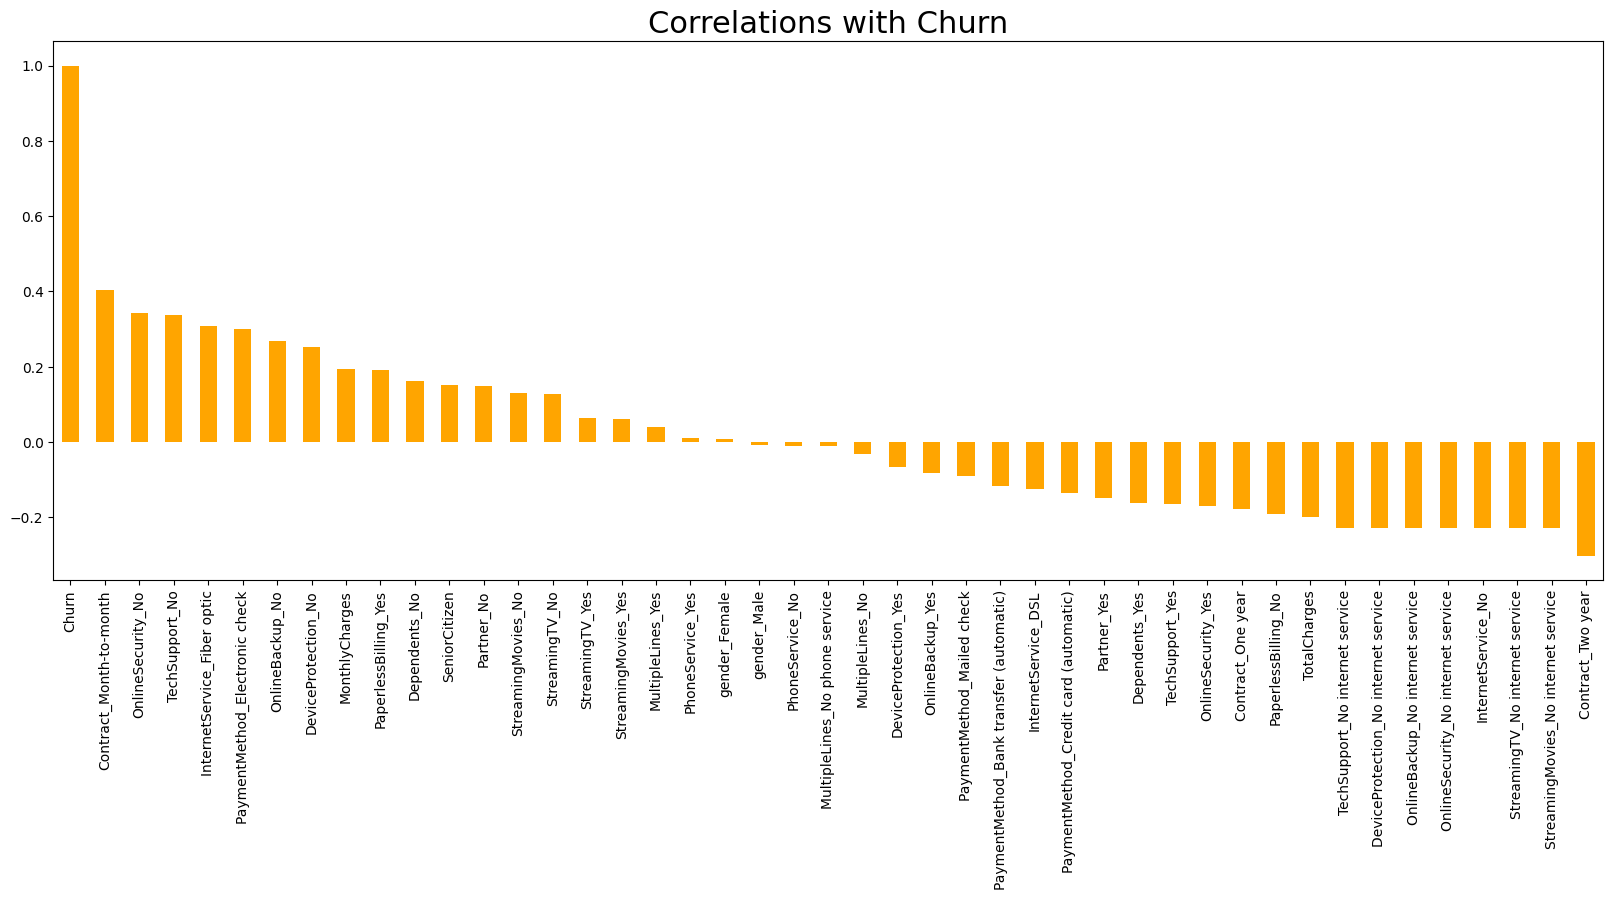

In [33]:
# Graphing the Churns Correlation

plt.figure(figsize=(20,7))
corr_matrix['Churn'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Correlations with Churn', fontsize=22)
plt.show()

In [34]:
# for bivariate analysis
churn_target_0 = df.loc[df['Churn'] == 0]
churn_target_1 = df.loc[df['Churn'] == 1]

In [35]:
def uniplot(data, col, title, hue=None):
    
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(8, 4))

    sns.countplot(data=data, y=col, order=data[col].value_counts().index, hue=hue, palette='bright', ax=ax)
    
    plt.title(title, fontsize=20)
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Count", fontsize=16, rotation=0)

    plt.xticks(rotation=45)

    plt.tight_layout() 
    plt.show()

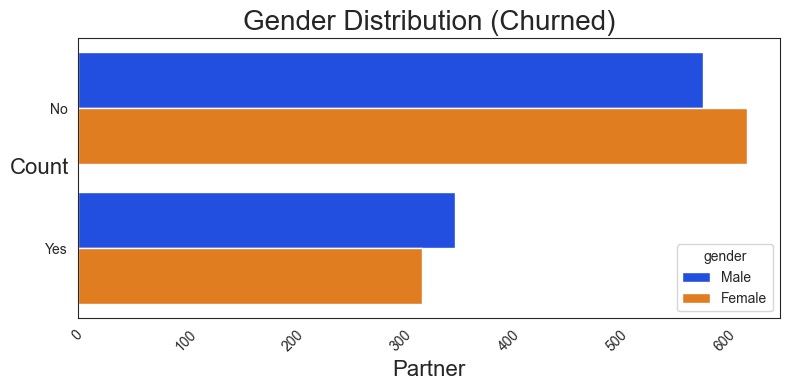

In [36]:
uniplot(churn_target_1, 'Partner', 'Gender Distribution (Churned)', 'gender')

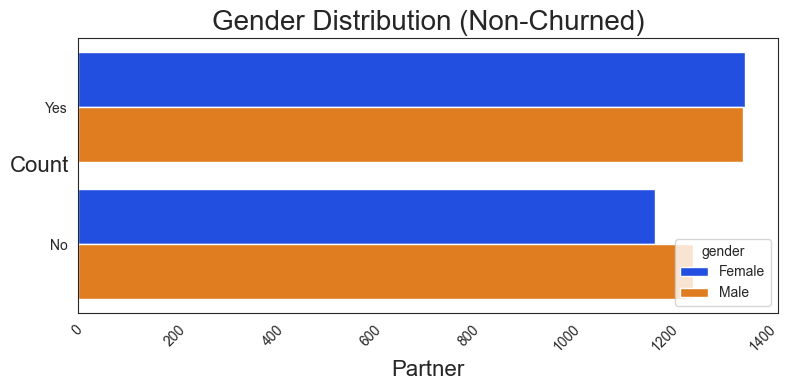

In [37]:
uniplot(churn_target_0, 'Partner', 'Gender Distribution (Non-Churned)', 'gender')

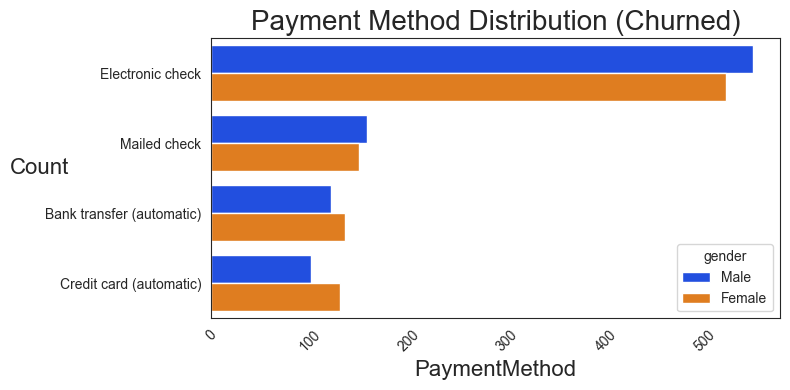

In [38]:
uniplot(churn_target_1, 'PaymentMethod', 'Payment Method Distribution (Churned)', 'gender')

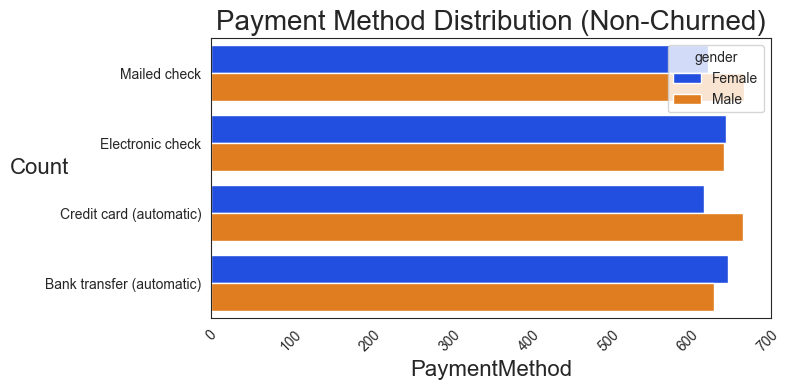

In [39]:
uniplot(churn_target_0, 'PaymentMethod', 'Payment Method Distribution (Non-Churned)', 'gender')

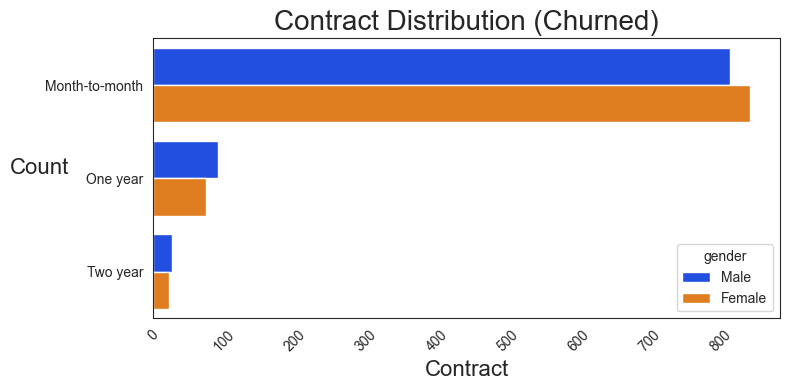

In [40]:
uniplot(churn_target_1, 'Contract', 'Contract Distribution (Churned)', 'gender')

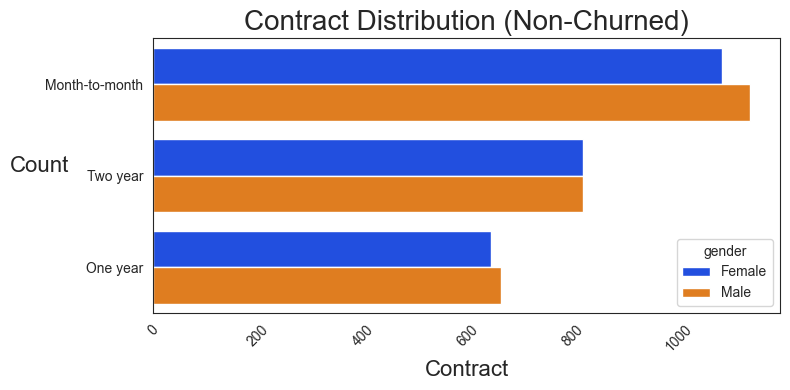

In [41]:
uniplot(churn_target_0, 'Contract', 'Contract Distribution (Non-Churned)', 'gender')

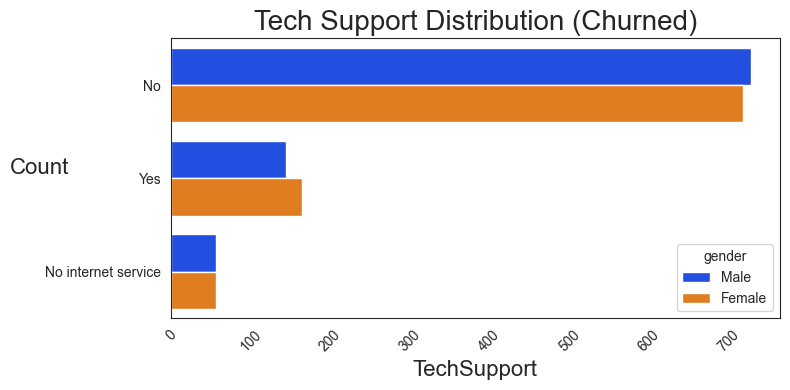

In [42]:
uniplot(churn_target_1, 'TechSupport', 'Tech Support Distribution (Churned)', 'gender')

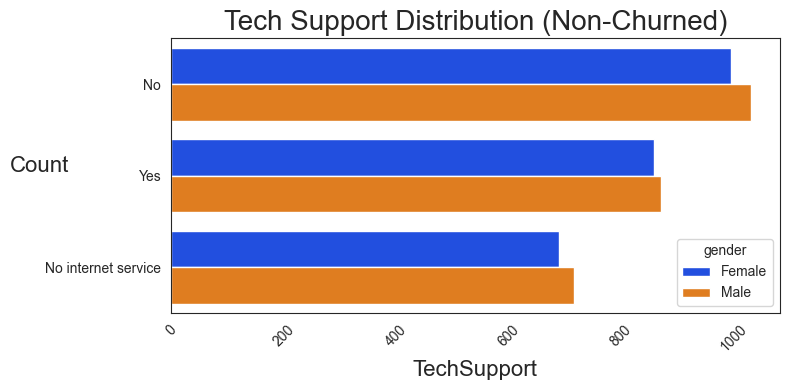

In [43]:
uniplot(churn_target_0, 'TechSupport', 'Tech Support Distribution (Non-Churned)', 'gender')

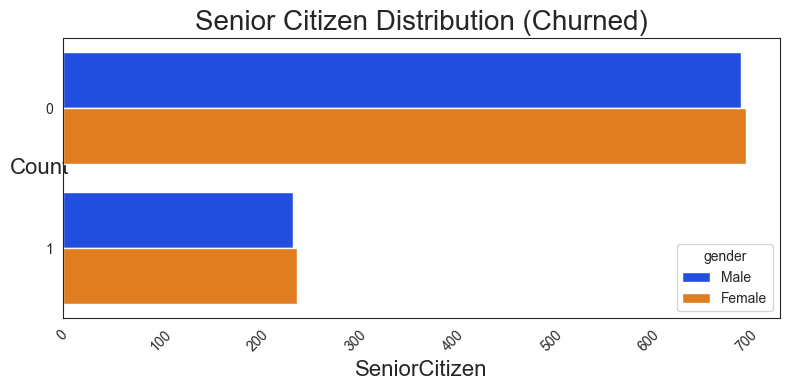

In [44]:
uniplot(churn_target_1, 'SeniorCitizen', 'Senior Citizen Distribution (Churned)', 'gender')

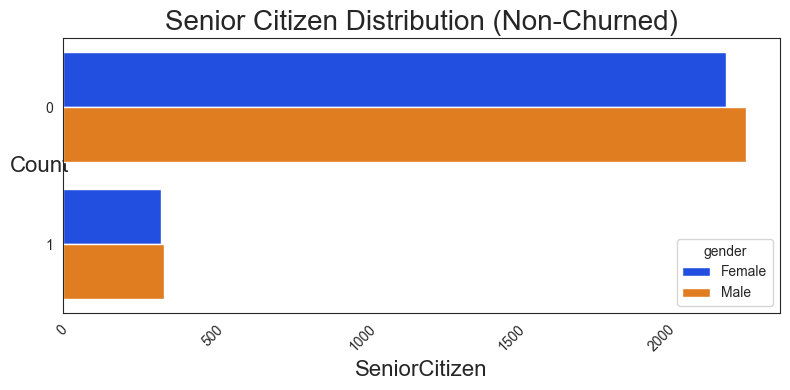

In [45]:
uniplot(churn_target_0, 'SeniorCitizen', 'Senior Citizen Distribution (Non-Churned)', 'gender')

In [46]:
df_dummies.to_csv('train_ready_churn_dataset.csv', index=False)